# WE09-CNN
# Bapuji Satyala 
# U61600601


This dataset is considered from the tensforflow dataset which is the Fashion MNIST which contains images of the clothing like the T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot which have 10 classes each representing one of the each item, where these images are of gryscale and are of resoultion 28x28 pixels  where 0 represents the black and 255 white.There are 60000 training images and there are 10000 testing images.A CNN model has been developed by considering pooling and predicted an image one of the 10 classes.

## Importing the required libraries that we will be using in this note book.

In [1]:
import numpy as np
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

np.random.seed(1) 
tf.random.set_seed(1)

Here we are importing the Fashion Mnist dataset from the Tensorflow's keras API, where we are reading the data into two tuples where the first tuple have the train images along with the train labels and the other have test images and test labels

## Image Readers

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Lets look at the shape of the train image where there are 60000 images of 28 pixels of height and 28 pixels of width resulting 784 pixels.

## Exploring the Image data and preprocessing 

In [3]:
train_images.shape

(60000, 28, 28)

Lets look at the number of labels in the train dataset that are tagged to the images.

In [4]:
len(train_labels)

60000

Lets look at the unique labels in the trained data 

In [5]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Lets look at the shape of the test image where there are 10000 images of 28 pixels of height and 28 pixels of width resulting 784 pixels.

In [6]:
test_images.shape

(10000, 28, 28)

class_name and class_indices are the lists that contains the names of the classes in the Fashion MNIST dataset so we are considering them and then we are creating a dictionary as both represent 10 classes with 10 types of clothingthere by using the zip function

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

class_dict = dict(zip(class_names, class_indices))

Here we are normalizing the pixels of the image by dividing the value with 255 such that the mage pixels lies between 0 to 1 such that normalized values will make the computation easy when sent across the layer of the network and the computational time will also gets reduced.

In [8]:
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

Lets plot by displaying the 25 images of that are of size 10x10 inches where we are iterating the first 25 images where we are dispaying the images in the 5 rows and 5 columns and we are removing the numerical labels and displaying with the acytual label of the image 

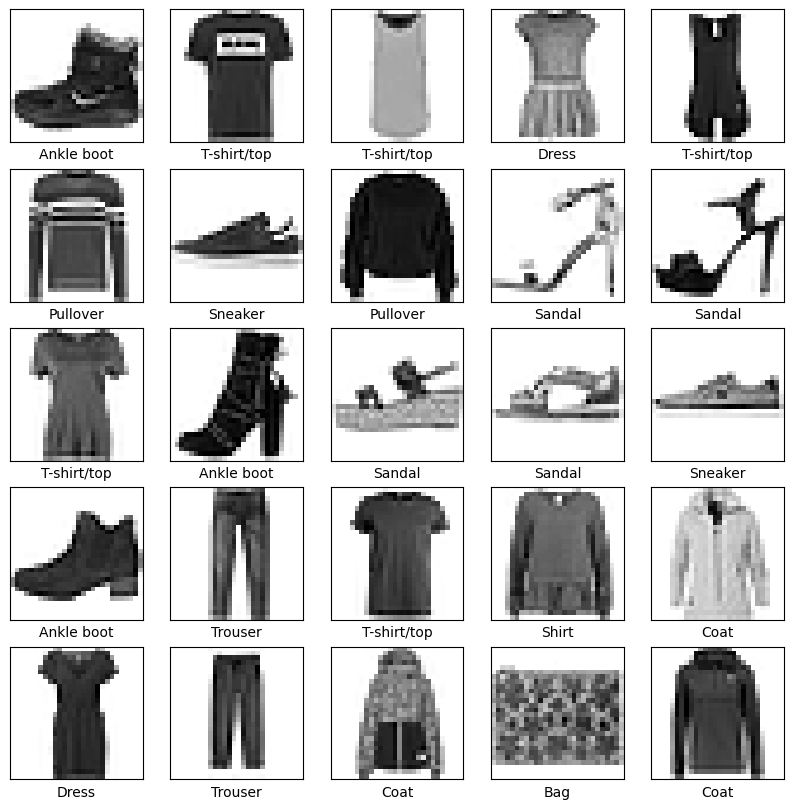

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

##  Creating the Convolutional Neural Network model and fitting it

The Convolutional neural network which is effectively used for analyzing the images.so the main layer is the convolution layer which applys set of filters which are known as kernels along with activation function where we also define the input layer, these convolution layers extract meaningful features from the input data by using the filters that are smaller matix that slides over the input image and by multiplying the matrix value of the filter with the value that the image holds there by assing these values at each position.there will be weights in the filter are computed and are updated through backpropogation inorder to minimize the difference between predicted output and true labels.The major difference between the weights wrt o the traditional network and the convolution layer is that each neuron has weights and in CNN the weights are applied across different spatial locations of the input image.

The pooling layer will reduce the spatial dimensions  of the feature maps where there are types of pooling like the  maximum pooling, average pooling and the minimum pooling and in our case we have considered the Max pooling.
The dropout layer acts as the regularization technique in order to prevent overfitting where the specified rate of ibnout values will be set to zero during each training epoch.The flatten layer servers a s a connection between convolution layer and the output or the dense layers which is responsible for converting the feature maps produced by the above layers into vector form.

In [10]:
model = Sequential()
# Add convolutional layer. Learn 32 filters using a 3x3 kernel
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))

# Add convolutional layer. Learn 64 filters using a 3x3 kernel
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.1))

# Flatten to a 1d array for feeding into our dense layer
model.add(Flatten())

# Add a dense layer with 64 neurons
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.1))

# Add the final prediction layer with 10 neurons, one for each class
model.add(Dense(10, activation='softmax'))




C:\Users\bapuj\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In our case we are creating a keras model and we are constructing the convolution layer with the filter size of 3x3  and we are considering the 32 filters the activation function is relu which is to introduce non linearity to the network which allows the network to approximate complex functions and learn mappings between ther input and the output.we have considered the input shape as 28,28 and 1 because the input image is having height of 28 and the width is 28 and the image is of grayscale so there will be only one layer hence we have taken it as 1.i have performed pooling in order to reduce the dimensions of the feature map. we are using pooling window of size 2x2 and we are using dropot rate is 0.15 which will drop around 15% of the inputs will randomly set to zero during each epoch

The Convolution model has to be compiled before the training, here we have considered the optimizer as adam which adjust the learning rate dynamically for each parameter during the training it also adds implicit regularization on the parameters during optimization and the loss is set to sparse categorical crossentropy, it calculates the cross entropy loss between the actual labels and the predicted probabilities and i have considered the metric as accuracy.

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Here we are fitting  the model with the trained images and the test images along with the trained labels and the test labels which are required to evaluate the model performance which is not the case in general models. The epochs are the iterations that are performed over the entire dataset each epoch will have one formward and pone backward pass of all the training.After fitting we are storing the evaluted metrices in the history which holds the loss and acciuracy of both the validation images and the training.




In [12]:
history = model.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7380 - loss: 0.7230 - val_accuracy: 0.8654 - val_loss: 0.3762
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8719 - loss: 0.3584 - val_accuracy: 0.8837 - val_loss: 0.3259
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8869 - loss: 0.3100 - val_accuracy: 0.8949 - val_loss: 0.2870
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9003 - loss: 0.2746 - val_accuracy: 0.8961 - val_loss: 0.2820
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9042 - loss: 0.2575 - val_accuracy: 0.9058 - val_loss: 0.2615
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9124 - loss: 0.2398 - val_accuracy: 0.9034 - val_loss: 0.2638
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9148 - loss: 0.2249 - val_accuracy: 0.9043 - val_loss: 0.2704
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9187 - loss: 

Here we are looking at the summary of the Convolutional neural network where we can see the proper architecture of the network, where the input layer have 32 filters which we have but we should have the shape as 28 but we have since there is no padding performed, the pooling layer followed by the droup are perfromed and we can see the parameters counts and if we observe there are 320 parameters n the convolution layer 1 and the parameters in the layer2 are 18496  anad in the dense layer whichh is the hidden layer we have areoun 102464 parameters and in total we can see that there are 365792 out of those 121930 are tarinable where there are optimizer parameters 243,862 as the information passes through each layers the model gets trained more and more in each epoch.

## Analysing the Performance of the model

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,792 (1.40 MB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,862 (952.59 KB)

Here we are predicting the test images with the help of the model that is trained with the trained images, here we are using the argmax to get the index of the class with the highest probability for eachimage and we are storing the list of class names in target names 

In [14]:
Y_pred = model.predict(test_images)
y_pred = np.argmax(Y_pred, axis=1)
# y_test is the actual labels
y_test = test_labels
target_names = list(class_names)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Here we are looking at the metrices that are predicted by the model on the test image. and the digit specifies as 4 which will give the 4 digits of the values after the decimal. As we ahve considered that our metric as the accuracy the model's accuracy when predicting the unknown data ie the test data is 0.91 and we can still see the different metrices for the 10 classes that are in the data like the precision score, recall and the f1score 

In [15]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

              precision    recall  f1-score   support

 T-shirt/top     0.8577    0.8500    0.8538      1000
     Trouser     0.9980    0.9750    0.9863      1000
    Pullover     0.8224    0.9030    0.8608      1000
       Dress     0.8865    0.9370    0.9110      1000
        Coat     0.8395    0.8790    0.8588      1000
      Sandal     0.9838    0.9690    0.9763      1000
       Shirt     0.8146    0.6680    0.7341      1000
     Sneaker     0.9626    0.9530    0.9578      1000
         Bag     0.9752    0.9830    0.9791      1000
  Ankle boot     0.9533    0.9790    0.9660      1000

    accuracy                         0.9096     10000
   macro avg     0.9094    0.9096    0.9084     10000
weighted avg     0.9094    0.9096    0.9084     10000



Lets look at the confusion matrix by considering the class labels on the vertical axis  and the map of the levels of the predictions that are given on the right where we can see that the Bag and sandal has been predicted correctly and the shirt holds to be less predicted where it is more confused as the T-shirt/top

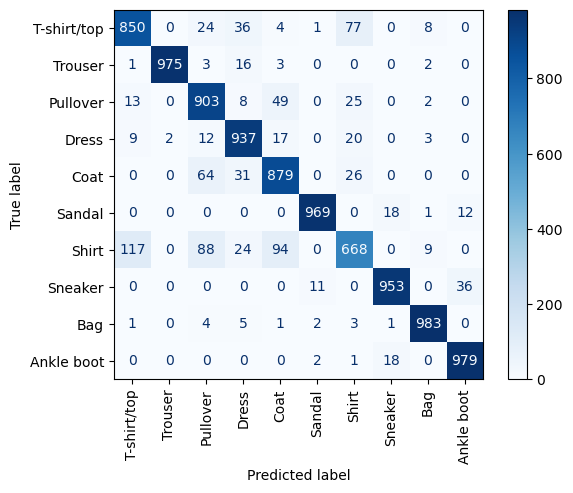

In [16]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation='vertical')
plt.show()

Here we are plotting the graphs between the accuracies ie both the train set accuracy and the validation set accuracy while they are vaying with the epoch count.

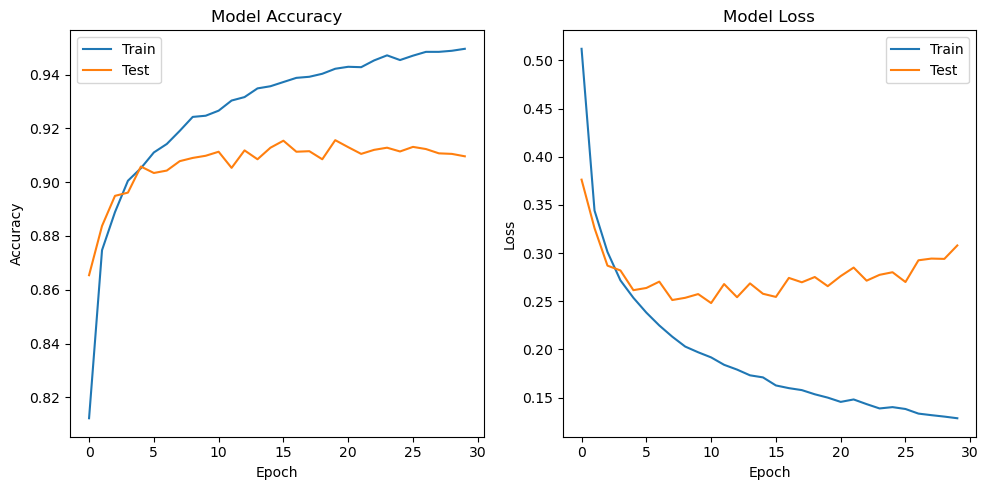

In [17]:
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

Here we can see in the Model loss varying with the epoch, we can that the train loss has been declining with the number of epoch increase, the test loss has been declined with the epoch vaying until 10 epochs and there is slight increase in the loss of the training images however we can see that as the epochs are increased the loss is increasing.

# Predict a single image

Here we are Predicting a single image out of all 10 classes from the model that is trained with the trained data

Here we are Selecting a particular image from the test data and we are diplaying that image and the color map is specified as binary which will map the image to balck and white colors.and we can see that i have randomly slected an image and displayed it and it is a shirt and we will predict the same by using the cnn model which is trained with the trained data.


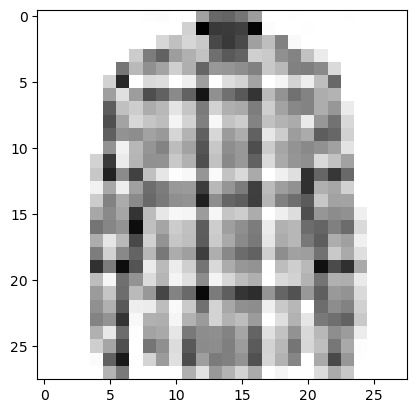

In [18]:
img =test_images[7]
plt.imshow(img,cmap=plt.cm.binary)


We are using the expand_dims to expand the dimensions of the image inorder to match the, since the model will expect batches of images as input shape of the model.where 0 specifies the index of new dimension is added in the beginning.We are predicting the image that we have selected by the model that is trained.

In [19]:
img1 = (np.expand_dims(img,0))

#generate preduction using our model
model.predict(img1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[1.4067613e-05, 6.2193558e-06, 4.1946652e-07, 9.6757278e-09,
        2.7238161e-03, 1.7309382e-09, 9.9725550e-01, 9.8139231e-19,
        1.2204069e-08, 1.1256074e-11]], dtype=float32)

Here we are rounding the prediction probailities that are done by the model until 2 decimal places

In [20]:
np.round(model.predict(img1),2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

We are finding the index where the prediction is maximumm value along the last axis

In [21]:
# Now, we need to find the index where the prediction array is 1
np.argmax(model.predict(img1), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([6], dtype=int64)

We have assigned the class_dict that holds the clas names and class labels that are assigned earlier.

In [22]:
# To get the label, we need to get the class indices from the training generator
label_map=(class_dict)

Now we are getting the predicted label class based on the class indicies where 0 plays vital role in selecting the label 

In [23]:
# Now, we can use our prediction and get the class label from the class indices:
[np.argmax(model.predict(img1), axis=-1)[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[6]

Here we are extarcting the class indices with the class labels and we can see that the model have predicted the single image as shirt

In [24]:
list(class_dict.keys())[np.argmax(model.predict(img1), axis=-1)[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


'Shirt'

### Summary

I have considered a dataset from the Fashion MNIST of the tensor flow dataset which contains images of the clothing Fashion MNIST which contains images of the clothing like the T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot which have 10 classes each representing one of the each item, where these images are of gryscale and are of resoultion 28x28 pixels  where 0 represents the black and 255 white.Read the data from the tensfor dataset and explored the data, and the data however is splitted into the train images, train labels and the test images, test labels. The images are normalized such that the range will be between 0 to 1 which will decrease the computational time of the model. The Convolutional neural network has been created and the convolution layer with the filters 32 which are of the size 3X3 with the activation function relu which will introduce non linearity to the model and the filters will provide extra information and provide the depth of the output volume and the drop out which is a regularization technique which will drop neurons and it is kept as 0.15 which means 15% of the units in the layer willl be randomly set to zero.Then in the convolutional layer 2 64 filters are considered with the size of the kernel as 3x3 and the max pooling has been selected as 2X2 whcih will down sample the dimensions and a flattening has been which is the process of converting the multi dimensional input into one dimensional array a hidden layer which is dense layer of neurons 64 has been created with the activation function such that flattened data will enter the hidden layers for computations and output layer of units 10 has been created a this is a multi class dataset of classes 10 from 0 to 9 such that our output layer has 10 neurons with softmax as activation function. The data has been trained and compiled and fitted the model with the trained images and test images along with the labels with accuracy as metric. The accuracy and loss of the validaition data is as follows

- The Validation accuracy is  0.9155 
- The Validation loss is 0.2935

Then i have selected a  single  image from the test data randomly which turn out to be as Shirt from the class of 0 to 9  and then tried predicting by the model that already beeen trained and the model successfully predicted it as SHIRT with the index number as well which is 6